In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
path ='./preprocessed_data/clean_data.csv'
df = pd.read_csv(path)
df = df.set_index(df['CustomerID']).drop('CustomerID', axis=1)

In [3]:
# Word vecrorization
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.05,max_df=0.40)
vectors = cv.fit_transform(df['processed_tags']).toarray()
vocabulary = cv.vocabulary_
vec_df = pd.DataFrame(vectors, columns=cv.get_feature_names_out(),index=df.index)
vec_df.head()

,3d,50s,50s christma,50s cracker,abc,acapulco,acapulco mat,acryl,acryl edwardian,advent,...,wreath,wreath unitedkingdom,yellow,yellow design,zinc,zinc folkart,zinc heart,zinc metal,zinc tlight,zinc unitedkingdom
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,0,0,0,0,0,0,7,7,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


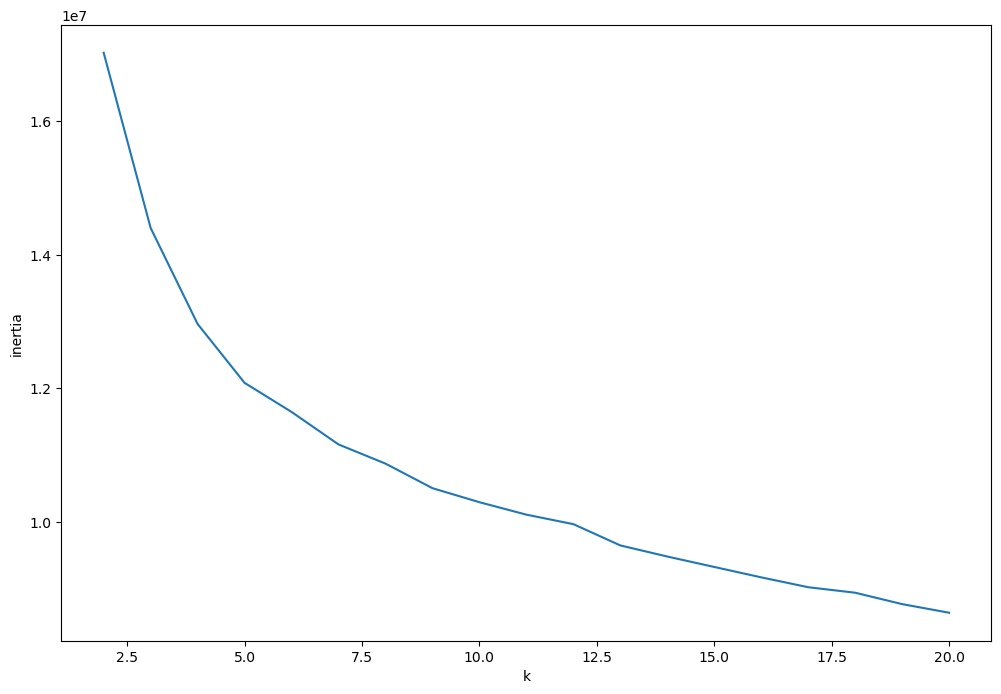

In [4]:
# Elbow Visualization calculation
k = []
inert = []
s = []
for i in range(2,21,1):
    kmeans = KMeans(n_clusters=i, random_state=200,init='k-means++')
    kmeans.fit(vectors)
    s.append(silhouette_score(vectors, kmeans.predict(vectors)))
    k.append(i)
    inert.append(kmeans.inertia_)
# Visualization
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(k,inert)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

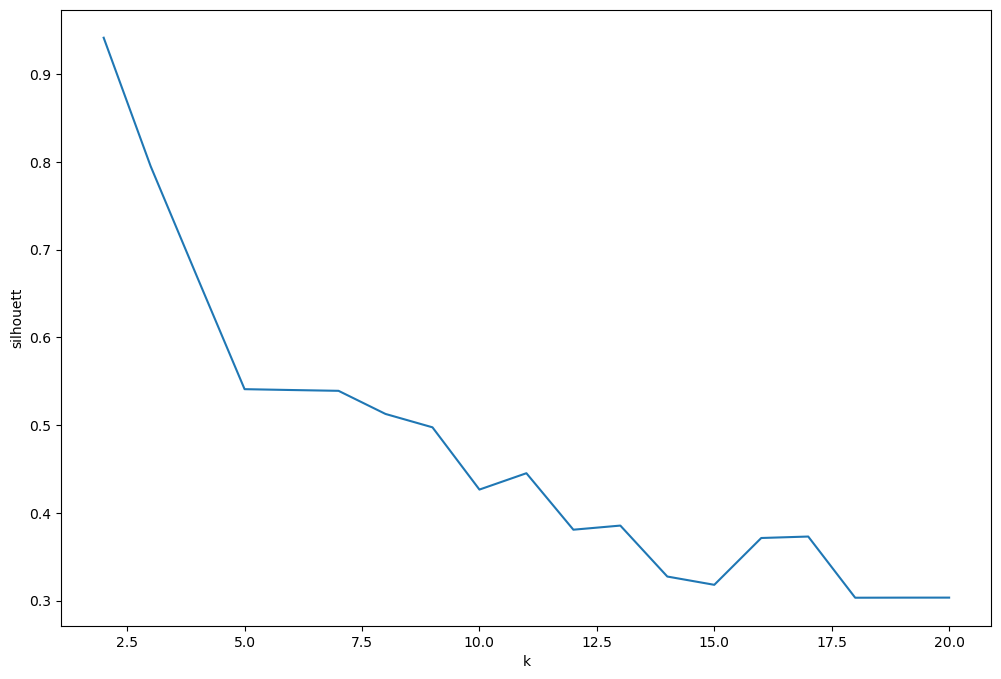

In [5]:
# Silhouette Score
plt.plot(k,s)
plt.xlabel('k')
plt.ylabel('silhouett')
plt.show()

In [6]:
# k = 12 is good
kmeans = KMeans(n_clusters=5, random_state=200, max_iter=200,init='k-means++')
kmeans.fit(vectors)
prediction = kmeans.predict(vectors)
vec_df['prediction'] = prediction